In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [22]:
df = pd.read_json('cleaned/netflix_movielens_cleaned.json')

In [23]:
df

,movieId,title,year,genres,imdbId,tmdbId,review_data
0,1,Dinosaur Planet,2003.0,"{'0': 'Adventure', '1': 'Animation', '2': 'Chi...",114709.0,862.0,"{'0': {'userId': '1488844', 'rating': 3.0, 'da..."
1,2,Isle of Man TT 2004 Review,2004.0,"{'0': 'Adventure', '1': 'Children', '2': 'Fant...",113497.0,8844.0,"{'0': {'userId': '2059652', 'rating': 4.0, 'da..."
2,3,Character,1997.0,"{'0': 'Comedy', '1': 'Romance'}",113228.0,15602.0,"{'0': {'userId': '1025579', 'rating': 4.0, 'da..."
3,4,Paula Abdul's Get Up & Dance,1994.0,"{'0': 'Comedy', '1': 'Drama', '2': 'Romance'}",114885.0,31357.0,"{'0': {'userId': '1065039', 'rating': 3.0, 'da..."
4,5,The Rise and Fall of ECW,2004.0,{'0': 'Comedy'},113041.0,11862.0,"{'0': {'userId': '1745265', 'rating': 5.0, 'da..."
...,...,...,...,...,...,...,...
10214,193581,Black Butler: Book of the Atlantic,2017.0,"{'0': 'Action', '1': 'Animation', '2': 'Comedy...",5476944.0,432131.0,"{'0': {'userId': 184, 'rating': 4.0, 'date': 1..."
10215,193583,No Game No Life: Zero,2017.0,"{'0': 'Animation', '1': 'Comedy', '2': 'Fantasy'}",5914996.0,445030.0,"{'0': {'userId': 184, 'rating': 3.5, 'date': 1..."
10216,193585,Flint,2017.0,{'0': 'Drama'},6397426.0,479308.0,"{'0': {'userId': 184, 'rating': 3.5, 'date': 1..."
10217,193587,Bungo Stray Dogs: Dead Apple,2018.0,"{'0': 'Action', '1': 'Animation'}",8391976.0,483455.0,"{'0': {'userId': 184, 'rating': 3.5, 'date': 1..."


### Some general findings about our dataframe:

In [24]:
unique_users = []

# iterate over each row
for index, row in df.iterrows():
    # iterate over each dictionary in the 'review_data' column of the current row
    for key, value in row['review_data'].items():
        user_id = value['userId']
        unique_users.append(user_id)

user_ids = set()  # set is used, because it does not allow for duplicates

# iterate over each row
for index, row in df.iterrows():
    # iterate over each dictionary in the 'review_data' column of the current row
    for key, value in row['review_data'].items():
        user_id = value['userId']
        user_ids.add(user_id)  # Add user ID to the set
    
print("There are {} reviews in our dataframe.".format(len(unique_users)))
print("There are {} unique unique users who have reviewed a movie.".format(len(user_ids)))

There are 4102111 reviews in our dataframe.
There are 418140 unique unique users who have reviewed a movie.


### How many movies per genre?

In [25]:
titles_and_genres = []

# iterate over each row
for index, row in df.iterrows():
    # check if 'genres' column contains a dictionary
    if isinstance(row['genres'], dict):
        # iterate over each key-value pair in the dictionary
        for key, value in row['genres'].items():
            # append a tuple containing the title and genre to the list
            titles_and_genres.append((row['title'], value))
    else:
        # handle the case where 'genres' column contains a string
        # you can decide what to do in this case, such as splitting the string by a delimiter
        pass  # or handle this case according to your requirements

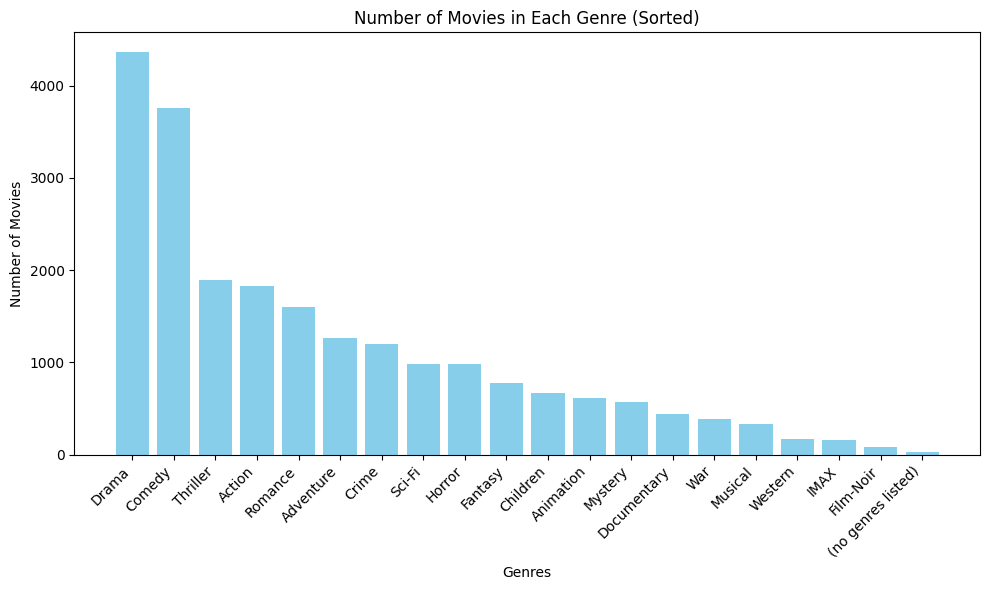

In [26]:
# Extract genres from the list of tuples
genres = np.array([genre for _, genre in titles_and_genres])

# Get unique genres and their counts
unique_genres, genre_counts = np.unique(genres, return_counts=True)

# Sort genres and counts by counts in descending order
sorted_indices = np.argsort(genre_counts)[::-1]
sorted_genres = unique_genres[sorted_indices]
sorted_counts = genre_counts[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_genres, sorted_counts, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

The most movies contain the genre **drama**.

### With genre is accociated with the most ratings?

### Handle outliers: